# Netflix ratings analysis

## Introduction
This project aims to analyse the ratings of Netflix movies and TV shows.
### Dataset 
The dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. as of mid 2021.
https://www.kaggle.com/datasets/shivamb/netflix-shows

### Importing required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading data

In [ ]:
try:
    df = pd.read_csv("netflix_titles.csv")
    print("Data Loaded successfully")
except FileNotFoundError:
    print("File 'netflix_titles.csv' not found")
except Exception as e:
    print(f"[ERROR] An unexpected error occurred: {temp(e).__name__}: {e}")

### Data Overview

In [ ]:
print(f"Total columns:\t{df.shape[1]}")
print(f"Total rows:\t{df.shape[0]}")
print(f"Column names:\n{list(df.columns)}")


df.info()
display(df.head(2))
display(df.tail(2))

### Data information:
There are total 12 columns.  
Issues found  
missing values in mulitple columns.  
3 in duration  
4 in ratings  
10 in date_added  
over 800 in cast  
over 800 in country  
over 2500 in director
date_added is object temp.


### Data Cleaning
First convert wrong data types into correct usable ones (e.g. 'duration' from string to time, 'rating' from string to float)

In [ ]:
# Duplicate dataframe for recovery
dff = df.copy() 

In [ ]:
# column wise cleaning

# standardize capitalization
df['temp'] = df['temp'].str.strip().str.title()

# removing extra whitespace
df['title'] = df['title'].str.strip() 

# Fill empty cells with Unknown
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

# convert from string to datetime
# leave inavlid/empty dates as NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')



# fill 'Unknown' to empty cells, remove blank space, and convert to upper case
df['rating'] = df['rating'].fillna('Unknown').str.strip().str.upper()

# Replace rare rating categories (frequency < 10) with 'Other'

rating_count = df['rating'].value_counts()
rare_rating_count = rating_count[rating_count < 10]
rare_rating_categories = rare_rating_count.index
df['rating'] = df['rating'].replace(rare_rating_categories, 'Other')
df['rating'].value_counts()
# since there were only 4 'UNKNOWN' values they were replaced with Other



In [ ]:
# clean remaining columns - duration, listed_in, description
# duration column has 'x min' for movies and 'x seasons' for TV shows
# create two new columns seaparating them 'duration_time' and 'duration_type' 

# using column wise sending

def extract_time(x):
    try:
        if pd.isna(x):
            return np.nan
        return int(x.strip().split()[0])
    except Exception:
        return np.nan
    
def extract_type(x):
    try:
        if pd.isna(x):
            return np.nan
        else:
            return x.strip().split()[1]
    except Exception:
        return np.nan
    
df['duration_time'] = df['duration'].apply(extract_time)
df['duration_type'] = df['duration'].apply(extract_type)
df.head(2)


In [ ]:
# row-wise sending row
# creating colums 'duration_time' and 'duration_type' 
def extract_time(row):
    try:
        if pd.isna(row['duration']):
            return np.nan
        else:
            return int(row['duration'].strip().split()[0])
    except Exception:
        return np.nan
    
def extract_duration(row):
    try:
        if pd.isna(row['duration']):
            return np.nan
        else:
            return row['duration'].strip().split()[1]
    except Exception:
        return np.nan

df['duration_time'] = df.apply(extract_time, axis=1)
df['duration_type'] = df.apply(extract_duration, axis=1)



In [ ]:
# Standardize duration units 
# convert mins to min and seasons to season
df['duration_type'] = df['duration_type'].replace({
    'mins': 'min',
    'Seasons': 'Season',
    'seasons': 'Season'
})


df['listed_in'] = df['listed_in'].str.strip()
# df['listed_in'] = df['listed_in'].apply(lambda x: ', '.join(i.strip() for i in x.split(',')) if pd.notna(x) else x)

df['description'] = df['description'].str.strip()


In [ ]:
# remove duplicates
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['title'], inplace=True)
df.drop_duplicates(subset='show_id', inplace=True)
df.reset_index(drop=True, inplace=True) #drop used to drop old index


### Save cleaned data into new csv file 'netflix_cleaned.csv'

In [ ]:
df.to_csv("netflix_cleaned.csv")

## Analysis

### Univariate Analysis

In [ ]:
# Movie vs Tv-shows count
def count_using_seaborn():

    plt.figure(figsize=(8,6))
    ax = sns.countplot(data=df, x='temp', color='yellow', edgecolor='black')
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+0.10, 
                str(height),
                ha='center',
                va='bottom',
                fontweight='bold')
    plt.title("Movie vs TV-Shows")
    plt.xlabel("Category")
    plt.show()


def count_using_matplotlib():
    type_count = df['temp'].value_counts()
    ls = np.arange(0, type_count.values.max(), 500)
    plt.figure(figsize=(8,6))
    bars = plt.bar(type_count.index, type_count.values, color='green', edgecolor='black')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, height+10, 
                str(height), 
                ha='center',
                va='bottom', 
                fontweight='bold'
                )
    
    plt.yticks(ls)
    plt.title("Movie vs TV-Shows")
    plt.xlabel("Category", fontdict={'fontweight':'bold'})
    plt.show()

count_using_matplotlib()
# count_using_seaborn()

In [ ]:
# Genere distribution
display(df['listed_in'].head(5))
# cells in df['listed_in' can have more than 1 genere seaprated by ','
# split each cell's item by ',' 
# and remove extra blsnkspace

all_genre = []
all_genre = [g.strip() for item in df['listed_in'] for g in item.split(',') ]

# or in simplere way

# all_genre = []
# for item in df['listed_in']:
#     genres = item.split(',')          # Split the string into a list of genres
#     for g in genres:
#         all_genre.append(g.strip())   # Strip spaces and append to final list


all_genre
all_genre_count = pd.Series(all_genre).value_counts()
all_genre_count


plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title("Count of each genere", fontsize=15, fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.xlabel("count", fontweight='bold')

plt.bar(all_genre_count.index, all_genre_count.values)
# plt.barh( all_genre_count.index, all_genre_count.values)
# sns.countplot(data=flat_genres, order=order)
plt.show()

In [ ]:
# Ratings Distribution


def plot_ratings_distribution(temp):
    if temp=='separate':
        ax = sns.countplot(data=df, x='rating'
              , order=df['rating'].value_counts().index
              ,edgecolor='black',
              hue='type')
    else :
        ax = sns.countplot(data=df, x='rating'
              , order=df['rating'].value_counts().index
              , color='green'
              ,edgecolor='black')
    for bar in ax.patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width()/2
        y = height + 25
        if temp=='separate': # rotate annotaion by 90
            ax.text(x,y, str(height), ha='center', va='bottom', rotation = 90)
        else: # do not rotate annotation
            ax.text(x,y, str(height), ha='center', va='bottom')


    if temp=='separate': # rotate annotaion by 90
        plt.title("Ratings distribution of Movies and Tv shows")
    else:
        plt.title("Ratings distribution")
    plt.tight_layout()
    plt.show()

plot_ratings_distribution(None) # Combined ratings in green
plot_ratings_distribution('separate') # Separate bars by 'type'


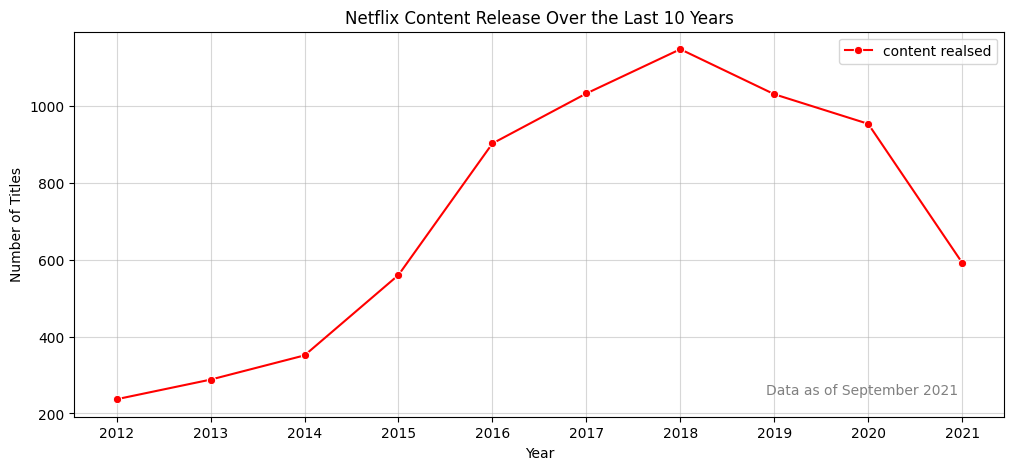

In [260]:
# content realsed by Netflix in last n years
def plot_content_releases(last_n_years=10):
    total_content_per_year = df['release_year'].value_counts()
    data = total_content_per_year.sort_index(ascending=False).head(last_n_years)
    # display(data)
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=data.index, y=data.values, marker='o', color='red', label="content realsed")
    plt.title(f"Netflix Content Release Over the Last {last_n_years} Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles")
    plt.grid(True, alpha=0.5)
    
    max_year = data.index.max()
    min_year = data.index.min()
    plt.xticks(np.arange(min_year, max_year+1, 1))

    
    
    plt.annotate(
        f"Data as of September 2021",
        xy=(0.95, 0.05),
        xycoords='axes fraction',
        # xycoords='figure fraction',

        ha='right',
        va='bottom',
        fontsize=10,
        color='gray'
    )
    
    plt.show()

plot_content_releases(10)

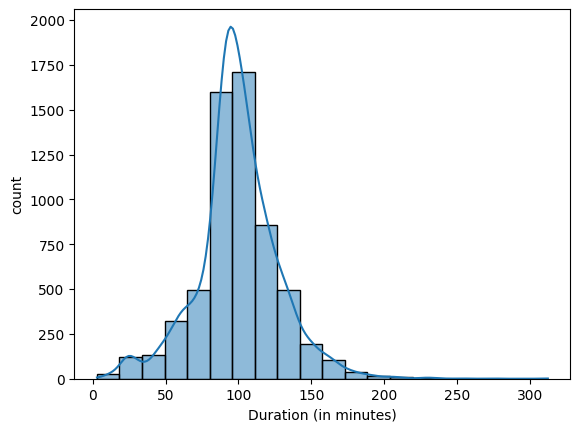

In [291]:
# Movie length distribution
df
df_movies = df[df["type"] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace('min', '').astype(float)

# confirm duration to be float
# df_movies.info()

sns.histplot(df_movies['duration'], bins=20, kde=True, edgecolor='black')
plt.xlabel("Duration (in minutes)")
plt.ylabel('count')
plt.show()


,title,duration
71,A StoryBots Space Adventure,13.0
694,Aziza,13.0
695,Besieged Bread,12.0
991,One Like It,15.0
1425,Creating The Queen's Gambit,14.0
1484,Cops and Robbers,8.0
1557,Canvas,9.0
1669,If Anything Happens I Love You,13.0
1745,Ya no estoy aquí: Una conversación entre Guill...,15.0
2713,Sol Levante,5.0


,title,duration
166,Once Upon a Time in America,229.0
717,Headspace: Unwind Your Mind,273.0
1019,Lagaan,224.0
2484,Lock Your Girls In,233.0
2487,No Longer kids,237.0
2488,Raya and Sakina,230.0
2491,The School of Mischief,253.0
4253,Black Mirror: Bandersnatch,312.0
7931,Sangam,228.0
